In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions

from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *


In [17]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [5]:
fileLocation = "/Users/weilu/Research/simulation_stepups/dataset_membrane/native_energy/1iwg_membrane/info.dat"
data = pd.read_csv(fileLocation, sep="\s+")

In [19]:
dataset = {}
dataset["membrane"] = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1rhz", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]
all_ = []
for pdb in dataset["membrane"]:
    fileLocation = f"/Users/weilu/Research/simulation_stepups/dataset_membrane/native_energy/{pdb}_membrane/info.dat"
    data = pd.read_csv(fileLocation, sep="\s+")
    all_.append(data.assign(Protein=pdb))
d_membrane = pd.concat(all_)
all_ = []
for pdb in dataset["membrane"]:
    fileLocation = f"/Users/weilu/Research/simulation_stepups/dataset_membrane/native_energy/{pdb}_globular/info.dat"
    data = pd.read_csv(fileLocation, sep="\s+")
    all_.append(data.assign(Protein=pdb))
d_globuar = pd.concat(all_)
d = pd.concat([d_membrane.assign(Frag="membrane"), d_globuar.assign(Frag="globular")]).reset_index(drop=True)

# conclusion: no siginicant difference.

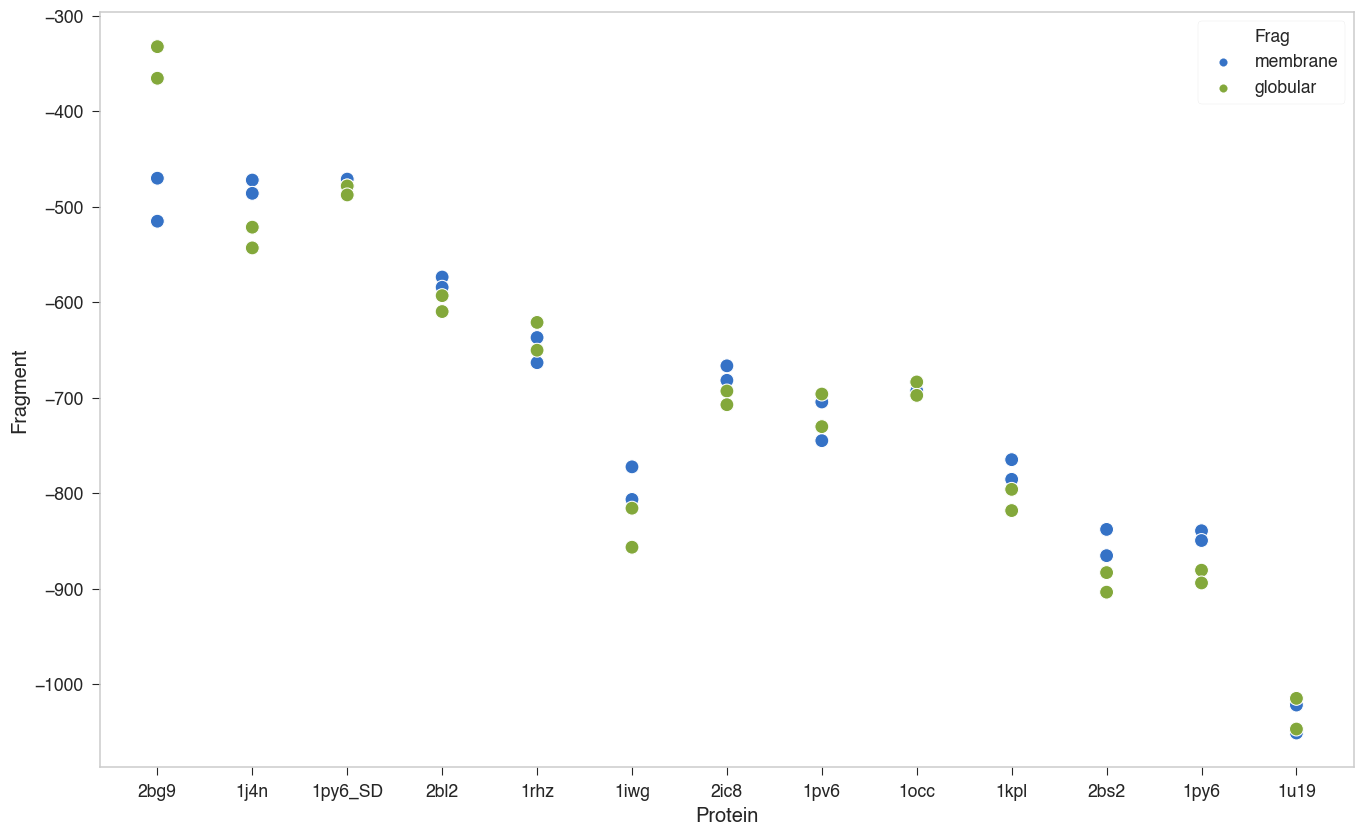

In [25]:
sns.scatterplot("Protein", "Fragment", hue="Frag", s=100, data=d)

In [31]:
def getFromTerminal(CMD):
    return subprocess.Popen(CMD,stdout=subprocess.PIPE,shell=True).communicate()[0].decode()
def mySize(pdb):
    protein_length = getFromTerminal(f"wc /Users/weilu/Research/simulation_stepups/dataset_membrane/setups/{pdb}/ssweight").split()[0]
    return protein_length

In [34]:
d["Length"] = d["Protein"].apply(lambda x: mySize(x))

In [37]:
d["Fragment_per_aa"] = d["Fragment"]/d["Length"].astype(int)

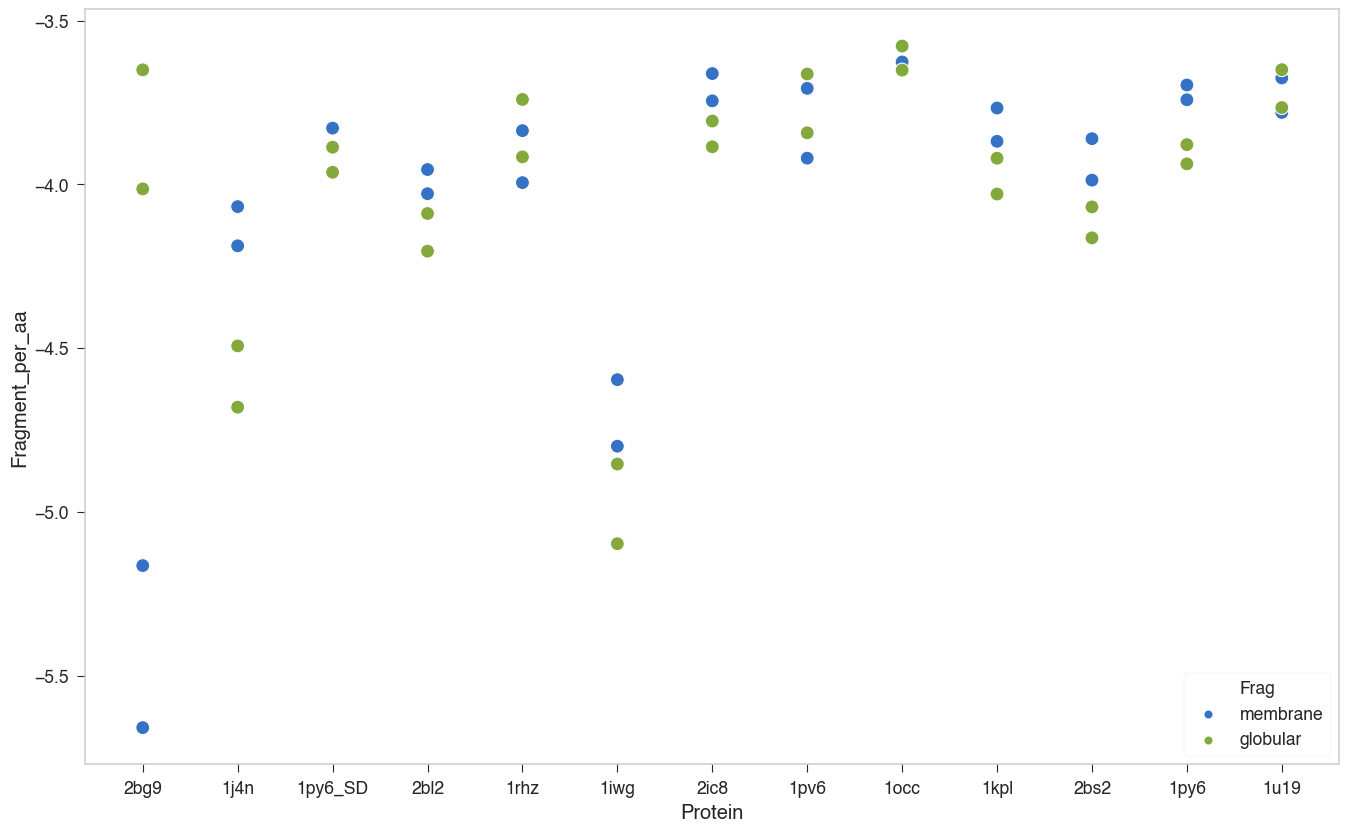

In [39]:
sns.scatterplot("Protein", "Fragment_per_aa", hue="Frag", s=100, data=d)

In [4]:
pdb = "/Users/weilu/Research/examples/openMM_compare_energy/model_062_noDNA"

In [5]:
structure = parse_pdb(pdb)

In [8]:
chains = list(structure.get_chains())

In [10]:
chain = chains[0]

In [16]:
res_list = list(chain.get_residues())
res_list = [residue for residue in res_list if not is_hetero(residue)]

In [18]:
res_list

[<Residue MET het=  resseq=1 icode= >,
 <Residue GLU het=  resseq=2 icode= >,
 <Residue GLU het=  resseq=3 icode= >,
 <Residue PRO het=  resseq=4 icode= >,
 <Residue GLN het=  resseq=5 icode= >,
 <Residue SER het=  resseq=6 icode= >,
 <Residue ASP het=  resseq=7 icode= >,
 <Residue PRO het=  resseq=8 icode= >,
 <Residue SER het=  resseq=9 icode= >,
 <Residue VAL het=  resseq=10 icode= >,
 <Residue GLU het=  resseq=11 icode= >,
 <Residue PRO het=  resseq=12 icode= >,
 <Residue PRO het=  resseq=13 icode= >,
 <Residue LEU het=  resseq=14 icode= >,
 <Residue SER het=  resseq=15 icode= >,
 <Residue GLN het=  resseq=16 icode= >,
 <Residue GLU het=  resseq=17 icode= >,
 <Residue THR het=  resseq=18 icode= >,
 <Residue PHE het=  resseq=19 icode= >,
 <Residue SER het=  resseq=20 icode= >,
 <Residue ASP het=  resseq=21 icode= >,
 <Residue LEU het=  resseq=22 icode= >,
 <Residue TRP het=  resseq=23 icode= >,
 <Residue LYS het=  resseq=24 icode= >,
 <Residue LEU het=  resseq=25 icode= >,
 <Residue

In [17]:
len(res_list)

393

In [ ]:
for chain in chains:

In [19]:
pd.read_csv("/Users/weilu/Downloads/Table-S1-career-2017.xlsx")

ParserError: Error tokenizing data. C error: Expected 3 fields in line 51, saw 7
